In [1]:
##Importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
##Loading images using ImageDataGenerator
train_data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_gen = train_data_gen.flow_from_directory('imgs/', batch_size=333, class_mode='binary')


Found 333 images belonging to 2 classes.


In [3]:
##Defining model architechture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
##Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')
model.save("Model/docModel")

ValueError: Model <keras.engine.sequential.Sequential object at 0x00000209FE84A140> cannot be saved because the input shape is not available. Please specify an input shape either by calling `build(input_shape)` directly, or by calling the model on actual data using `Model()`, `Model.fit()`, or `Model.predict()`.

In [ ]:
#Training model
history = model.fit(
    train_gen,
    steps_per_epoch = 333,
    epochs = 1
)

333/333 [==============================] - 15s 214us/step - loss: 10.5446 - accuracy: 0.5165


In [ ]:
#Testing model - 132 Cats(1) & 115 Dogs(0) = 132/247 = .5344 = 100% accuracy
test_data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = test_data_gen.flow_from_directory('TestData',
                                             class_mode='binary')
test_loss, test_acc = model.evaluate(test_gen, steps = 247)

Found 247 images belonging to 2 classes.
247/247 [==============================] - 7s 24ms/step - loss: 3.3601 - accuracy: 0.5344


Found 6 images belonging to 2 classes.
6/6 [==============================] - 0s 19ms/step
[[0.00454385]
 [0.00049693]
 [0.00114051]
 [0.00626346]
 [0.01977611]
 [0.00171224]]


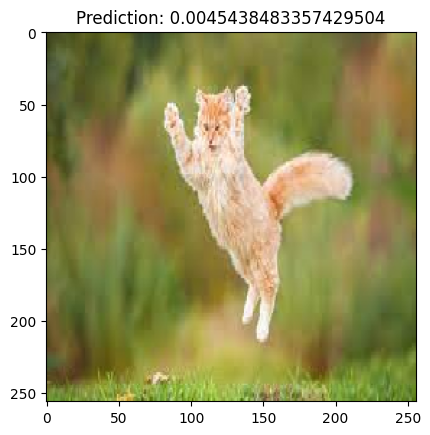

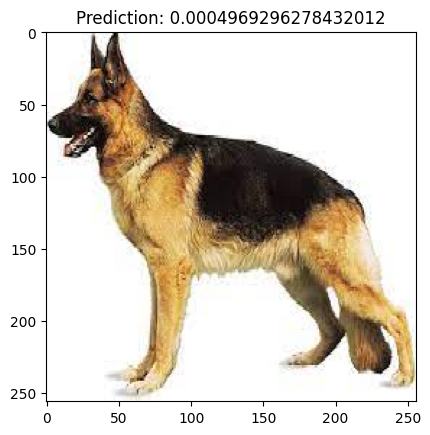

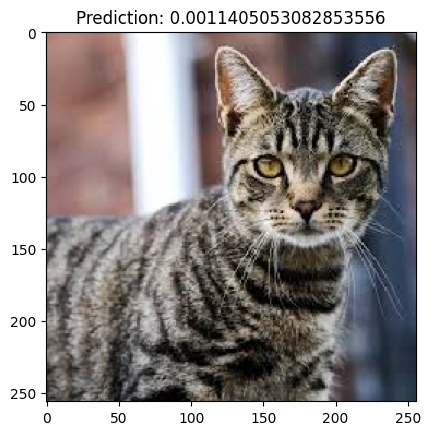

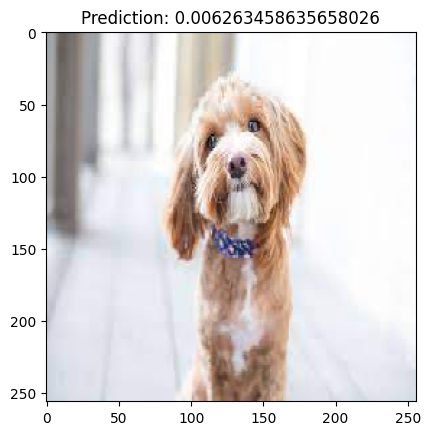

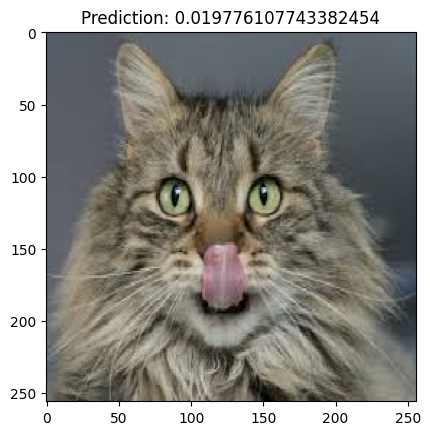

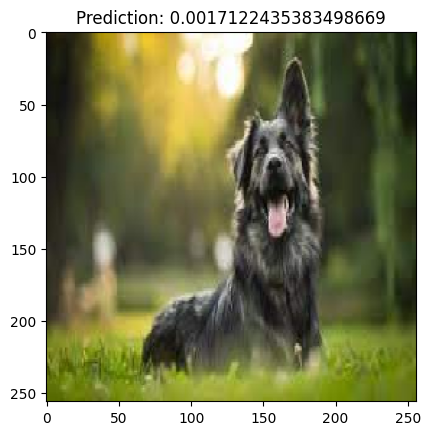

In [ ]:
##Program tests images in the ImgsToTest directory
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.utils import load_img


model = load_model('Model/docModel/')


test_Dir = 'ImagesToTest'

#define generator
data_Gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
#load data using genrator
data_flow = data_Gen.flow_from_directory(test_Dir, 
                                         batch_size= 1,
                                         class_mode = 'binary')

predictions = model.predict(data_flow, steps=6)

print(predictions)

for batch_index in range(len(predictions)):
    batch_predictions = predictions[batch_index]
    batch_images, _ = data_flow[batch_index]
    
    # loop over each image in the batch
    for image_index in range(len(batch_predictions)):
        image_prediction = batch_predictions[image_index]
        image = batch_images[image_index]
        
        # display the image and its prediction
        plt.imshow(image)
        plt.title(f"Prediction: {image_prediction}")
        plt.show()